In [614]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.stats import f_oneway
import bar_chart_race as bcr

In [615]:
# Retrieve file path
file_path = Path('listings.csv')
# Read csv
airbnb_df = pd.read_csv(file_path)
# Display dataframe
airbnb_df

,id,name,num_bedrooms,bedroom_type,num_of_beds,num_of_bathrooms,bathroom_type,host_name,neighbourhood_group,neighbourhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,8.187800e+17,Home in Brooklyn,9,bedrooms,11,4.0,baths,Ming,Brooklyn,Crown Heights,...,Entire home/apt,832,30,7,10/8/2023,0.77,3,14,7,NaN
1,7.449090e+17,Rental unit in New York,9,bedrooms,12,3.0,baths,Jude,Manhattan,Harlem,...,Entire home/apt,959,1,4,10/5/2023,0.55,12,334,4,Exempt
2,3.486668e+07,Home in Brooklyn,9,bedrooms,11,4.0,baths,Philip,Brooklyn,Crown Heights,...,Entire home/apt,754,30,31,9/3/2023,0.58,4,240,5,NaN
3,4.578519e+07,Townhouse in New York,9,bedrooms,9,6.5,baths,Outsite,Manhattan,Murray Hill,...,Entire home/apt,1500,30,2,8/14/2021,0.06,13,179,0,NaN
4,2.851497e+07,Rental unit in Brooklyn,9,bedrooms,1,1.0,shared,Leo,Brooklyn,Greenpoint,...,Private room,95,30,5,7/15/2021,0.08,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20142,4.037120e+05,Rental unit in New York,1,bedroom,1,1.0,bath,Giovanni,Manhattan,East Village,...,Entire home/apt,300,30,6,10/29/2012,0.04,1,0,0,NaN
20143,7.565800e+04,Loft in Brooklyn,1,bedroom,1,1.0,shared,Noemi,Brooklyn,Bedford-Stuyvesant,...,Private room,221,30,20,9/30/2012,0.13,1,364,0,NaN
20144,5.133430e+05,Rental unit in Brooklyn,1,bedroom,2,1.0,bath,Dennis,Brooklyn,Prospect Heights,...,Entire home/apt,125,30,1,7/11/2012,0.01,1,298,0,NaN
20145,4.565780e+05,Rental unit in New York,1,bedroom,1,1.0,shared,Helen,Manhattan,Washington Heights,...,Private room,100,30,1,6/1/2012,0.01,1,87,0,NaN


In [616]:
# Fix spelling errors
airbnb_df = airbnb_df.rename(columns={'neighbourhood_group': 'neighborhood_group',
                          'neighbourhood': 'neighborhood'})
airbnb_df.head()

,id,name,num_bedrooms,bedroom_type,num_of_beds,num_of_bathrooms,bathroom_type,host_name,neighborhood_group,neighborhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,8.187800e+17,Home in Brooklyn,9,bedrooms,11,4.0,baths,Ming,Brooklyn,Crown Heights,...,Entire home/apt,832,30,7,10/8/2023,0.77,3,14,7,NaN
1,7.449090e+17,Rental unit in New York,9,bedrooms,12,3.0,baths,Jude,Manhattan,Harlem,...,Entire home/apt,959,1,4,10/5/2023,0.55,12,334,4,Exempt
2,3.486668e+07,Home in Brooklyn,9,bedrooms,11,4.0,baths,Philip,Brooklyn,Crown Heights,...,Entire home/apt,754,30,31,9/3/2023,0.58,4,240,5,NaN
3,4.578519e+07,Townhouse in New York,9,bedrooms,9,6.5,baths,Outsite,Manhattan,Murray Hill,...,Entire home/apt,1500,30,2,8/14/2021,0.06,13,179,0,NaN
4,2.851497e+07,Rental unit in Brooklyn,9,bedrooms,1,1.0,shared,Leo,Brooklyn,Greenpoint,...,Private room,95,30,5,7/15/2021,0.08,2,0,0,NaN


In [617]:
# Retrieve bathroom type data
bath_type = airbnb_df['bathroom_type']
bath_type.head()

0     baths
1     baths
2     baths
3     baths
4    shared
Name: bathroom_type, dtype: object

In [618]:
# Retrieve bedroom type data
bed_type = airbnb_df['bedroom_type']
bed_type.head()

0    bedrooms
1    bedrooms
2    bedrooms
3    bedrooms
4    bedrooms
Name: bedroom_type, dtype: object

In [619]:
# Retrieve number of beds data
num_of_beds = airbnb_df['num_of_beds']
num_of_beds.head()

0    11
1    12
2    11
3     9
4     1
Name: num_of_beds, dtype: int64

In [620]:
# Retrieve number of bedrooms data
num_bedrooms = airbnb_df['num_bedrooms']
num_bedrooms.head()

0    9
1    9
2    9
3    9
4    9
Name: num_bedrooms, dtype: int64

In [621]:
# Retrieve number of bathrooms data
num_bathrooms = airbnb_df['num_of_bathrooms']
num_bedrooms.head()

0    9
1    9
2    9
3    9
4    9
Name: num_bedrooms, dtype: int64

In [622]:
# Retrieve neighborhood group data
neighborhood_group = airbnb_df['neighborhood_group']
neighborhood_group.head()

0     Brooklyn
1    Manhattan
2     Brooklyn
3    Manhattan
4     Brooklyn
Name: neighborhood_group, dtype: object

In [623]:
# Retrieve neghborhood data
neighborhood = airbnb_df['neighborhood']
neighborhood.head()

0    Crown Heights
1           Harlem
2    Crown Heights
3      Murray Hill
4       Greenpoint
Name: neighborhood, dtype: object

In [624]:
# Retrieve room type data
room_type = airbnb_df['room_type']
room_type.head()

0    Entire home/apt
1    Entire home/apt
2    Entire home/apt
3    Entire home/apt
4       Private room
Name: room_type, dtype: object

In [625]:
# Retrieve price data
price = airbnb_df['price']
price.head()

0     832
1     959
2     754
3    1500
4      95
Name: price, dtype: int64

In [626]:
# Retrieve minimum nights data
min_nights = airbnb_df['minimum_nights']
min_nights.head()

0    30
1     1
2    30
3    30
4    30
Name: minimum_nights, dtype: int64

In [627]:
# Retrieve number of reviews data
num_of_reviews = airbnb_df['number_of_reviews']
num_of_reviews.head()

0     7
1     4
2    31
3     2
4     5
Name: number_of_reviews, dtype: int64

In [628]:
room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [629]:
Shared_Room = []
Hotel_Room = []
Homes_or_Apartments = []
Private_Rooms = []

for place in room_type:
    if place == 'Private room':
        Private_Rooms.append(place)
    elif place == 'Hotel room':
        Hotel_Room.append(place)
    elif place == 'Entire home/apt':
        Homes_or_Apartments.append(place)
    elif place == 'Shared room':
        Shared_Room.append(place)


In [630]:
private_rooms = len(Private_Rooms)
hotel_room = len(Hotel_Room)
homes_or_apartments = len(Homes_or_Apartments)
shared_room = len(Shared_Room)

list_of_values = [private_rooms, hotel_room, homes_or_apartments, shared_room]
list_of_values

[8473, 112, 11282, 280]

In [631]:
sizes = list_of_values

labels = ['Private Rooms', 'Hotel Rooms', 'Homes or Apartments', 'Shared Rooms']

colors = ['orange', 'purple', 'blue', 'green']

explode = (0.1, 0.1, 0.1, 0.1)

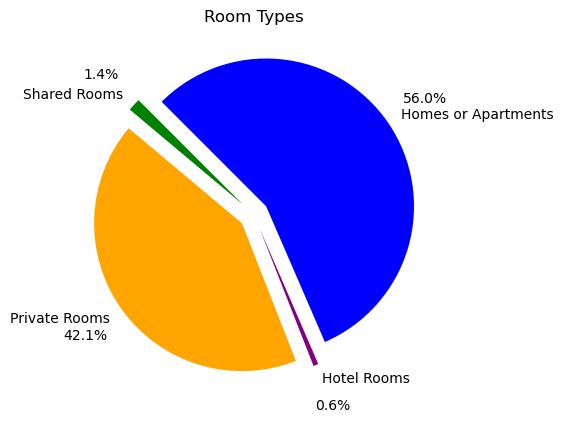

In [632]:
plt.pie(sizes, explode=explode, labels=labels,colors=colors,
        autopct="%1.1f%%", pctdistance = 1.3,shadow=False, startangle=140)
plt.title("Room Types")
#plt.figure(facecolor="blue")
#ax.set_facecolor("violet")
#Pie Chart push % outside of pie
#fig, ax = plt.subplots()
#ax.pie(value, autopct = '%1.1f%%', pctdistance = 1.1)
plt.savefig("Airbnb_Room_Types_Pie_Chart1.png", transparent=True)
plt.show()

In [633]:
airbnb_df


,id,name,num_bedrooms,bedroom_type,num_of_beds,num_of_bathrooms,bathroom_type,host_name,neighborhood_group,neighborhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,8.187800e+17,Home in Brooklyn,9,bedrooms,11,4.0,baths,Ming,Brooklyn,Crown Heights,...,Entire home/apt,832,30,7,10/8/2023,0.77,3,14,7,NaN
1,7.449090e+17,Rental unit in New York,9,bedrooms,12,3.0,baths,Jude,Manhattan,Harlem,...,Entire home/apt,959,1,4,10/5/2023,0.55,12,334,4,Exempt
2,3.486668e+07,Home in Brooklyn,9,bedrooms,11,4.0,baths,Philip,Brooklyn,Crown Heights,...,Entire home/apt,754,30,31,9/3/2023,0.58,4,240,5,NaN
3,4.578519e+07,Townhouse in New York,9,bedrooms,9,6.5,baths,Outsite,Manhattan,Murray Hill,...,Entire home/apt,1500,30,2,8/14/2021,0.06,13,179,0,NaN
4,2.851497e+07,Rental unit in Brooklyn,9,bedrooms,1,1.0,shared,Leo,Brooklyn,Greenpoint,...,Private room,95,30,5,7/15/2021,0.08,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20142,4.037120e+05,Rental unit in New York,1,bedroom,1,1.0,bath,Giovanni,Manhattan,East Village,...,Entire home/apt,300,30,6,10/29/2012,0.04,1,0,0,NaN
20143,7.565800e+04,Loft in Brooklyn,1,bedroom,1,1.0,shared,Noemi,Brooklyn,Bedford-Stuyvesant,...,Private room,221,30,20,9/30/2012,0.13,1,364,0,NaN
20144,5.133430e+05,Rental unit in Brooklyn,1,bedroom,2,1.0,bath,Dennis,Brooklyn,Prospect Heights,...,Entire home/apt,125,30,1,7/11/2012,0.01,1,298,0,NaN
20145,4.565780e+05,Rental unit in New York,1,bedroom,1,1.0,shared,Helen,Manhattan,Washington Heights,...,Private room,100,30,1,6/1/2012,0.01,1,87,0,NaN


In [634]:
room_types = airbnb_df['room_type'].unique()
room_types

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

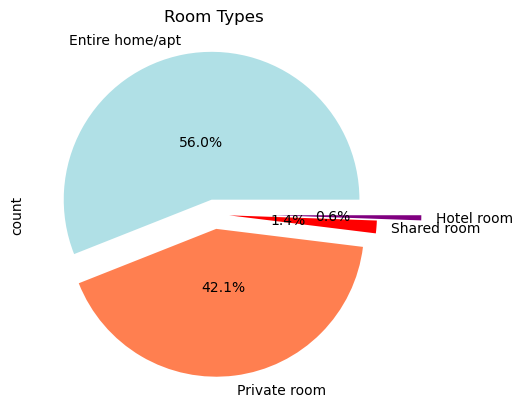

<Figure size 640x480 with 0 Axes>

In [635]:
room_types = airbnb_df["room_type"].value_counts()
room_types.plot(kind="pie",autopct="%1.1f%%",pctdistance = 0.4, shadow=False, colors=['powderblue', 'coral', 'red', 'purple'],explode=room_explode)
#plt.figure(figsize=(10, 6))
plt.title("Room Types")
plt.show()
plt.savefig(fname="Airbnb_Room_Types_Pie_Chart_alt1.png", transparent=True) 

In [636]:
summary_stats = airbnb_df.groupby('neighborhood_group')['price'].describe()
print(summary_stats)

                     count        mean          std   min    25%    50%  \
neighborhood_group                                                        
Bronx                918.0  119.549020   335.778666  24.0   59.0   90.0   
Brooklyn            7487.0  187.075731  1642.848690  10.0   79.0  125.0   
Manhattan           7809.0  228.231144   378.671430  10.0  100.0  150.0   
Queens              3648.0  126.929550   201.039048  17.0   62.0   98.0   
Staten Island        285.0  119.224561    92.003208  33.0   70.0   99.0   

                      75%       max  
neighborhood_group                   
Bronx               129.0    9994.0  
Brooklyn            195.0  100000.0  
Manhattan           245.0   10000.0  
Queens              150.0   10000.0  
Staten Island       139.0    1000.0  


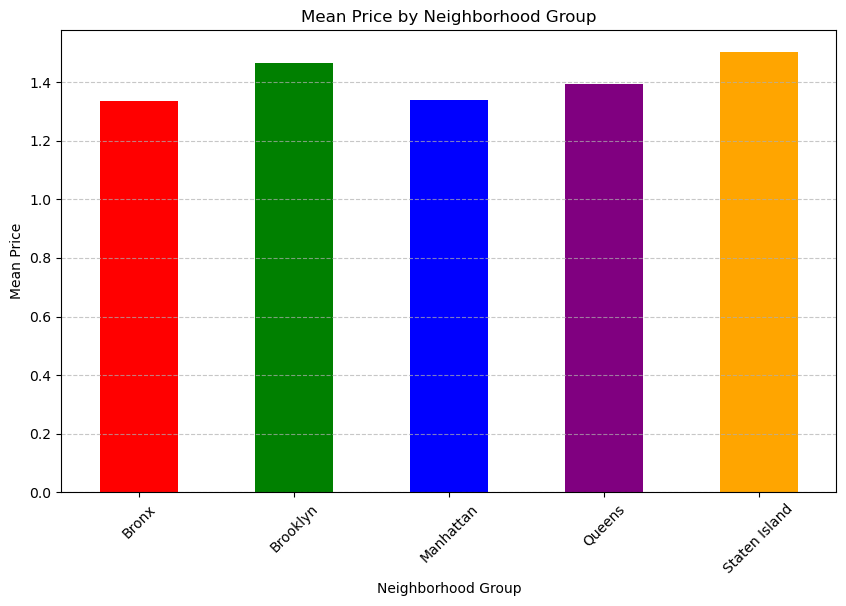

In [649]:
plt.figure(figsize=(10, 6))
summary_stats['mean'].plot(kind='bar', color=['red','green','blue','purple','orange'])
plt.title('Mean Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(fname="Airbnb_meanprice_bynieghborhood.png", transparent=True) 
plt.show()

In [638]:
room_types = airbnb_df['num_bedrooms'].unique()
room_types

array([9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [639]:
beds_explode =  (0.1, 0.1, 0.1, 0.1,0.3,0.1,0.1,0.2,0.3)

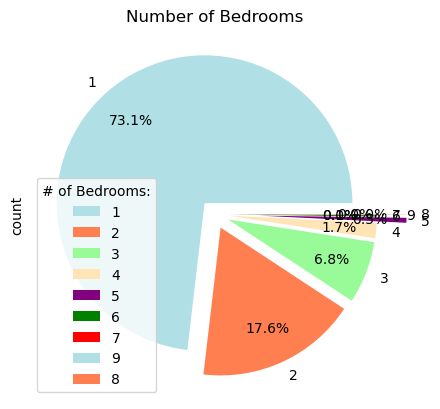

<Figure size 60000x60000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [640]:
room_types = airbnb_df["num_bedrooms"].value_counts(ascending=False)
room_types.plot(kind="pie",autopct="%1.1f%%", pctdistance = 0.75,colors=['powderblue', 'coral', 'palegreen', 'moccasin','purple','green','red'],explode=beds_explode)
plt.title("Number of Bedrooms")
plt.legend(title="# of Bedrooms:")
plt.figure(figsize=(600,600))
plt.show()
plt.savefig(fname="Airbnb_Number_of_Rooms_Types_Pie_Chart1.png", transparent=True) 

In [641]:
summary_stats = airbnb_df.groupby('neighborhood_group')['num_bedrooms'].describe()
print(summary_stats)

                     count      mean       std  min  25%  50%  75%  max
neighborhood_group                                                     
Bronx                918.0  1.335512  0.705688  1.0  1.0  1.0  1.0  6.0
Brooklyn            7487.0  1.463871  0.843322  1.0  1.0  1.0  2.0  9.0
Manhattan           7809.0  1.340120  0.722040  1.0  1.0  1.0  1.0  9.0
Queens              3648.0  1.391996  0.762690  1.0  1.0  1.0  2.0  7.0
Staten Island        285.0  1.501754  0.898452  1.0  1.0  1.0  2.0  6.0


In [642]:
import pandas as pd

# Assuming airbnb_data is your DataFrame

# Drop rows with price above 8000 for visualizations
filtered_df = airbnb_df[airbnb_df['price'] <= 3000]




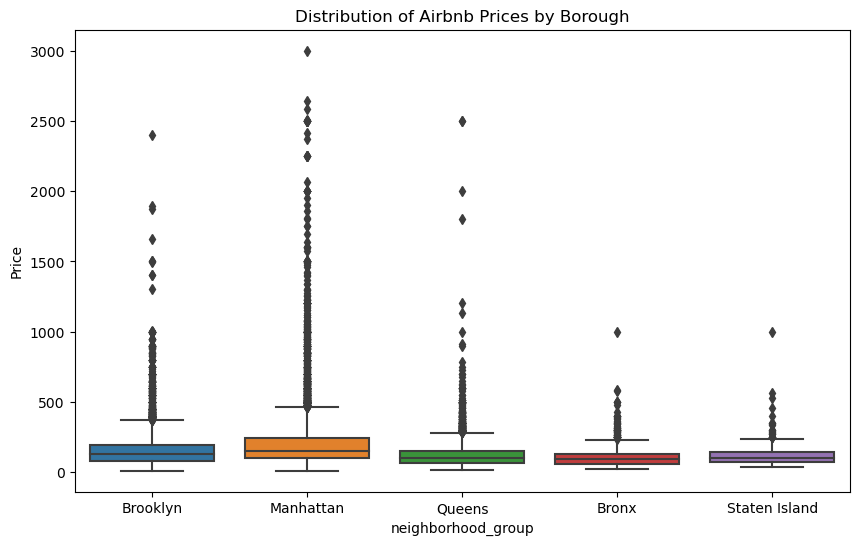

In [643]:
# Visualization - Box plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='neighborhood_group', y='price', data=filtered_df)
plt.title('Distribution of Airbnb Prices by Borough')
plt.xlabel('neighborhood_group')
plt.ylabel('Price')
plt.show()


In [644]:
# Extract prices for each borough
borough_prices = []
for neighborhood_group, group_df in filtered_df.groupby('neighborhood_group'):
    borough_prices.append(group_df['price'])

In [645]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(*borough_prices)

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation of results
if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences in prices among boroughs.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in prices among boroughs.")

F-statistic: 245.15951969452334
p-value: 5.682788488037132e-206
Reject null hypothesis: There are significant differences in prices among boroughs.


C:\Users\jeff\AppData\Local\Temp\ipykernel_15968\2008836847.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='neighborhood_group', y='price', data=filtered_df, ci='sd')  # ci='sd' for error bars based on standard deviation


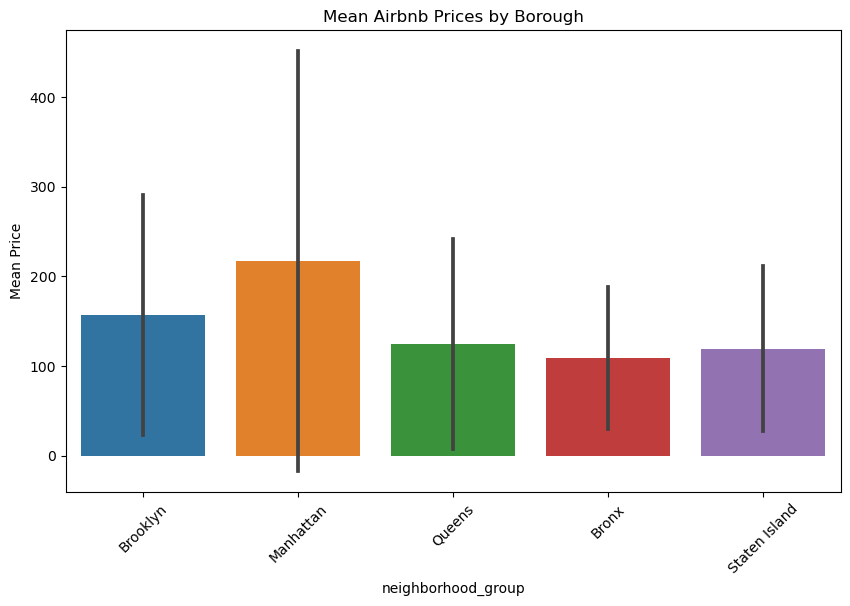

In [646]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='neighborhood_group', y='price', data=filtered_df, ci='sd')  # ci='sd' for error bars based on standard deviation
plt.title('Mean Airbnb Prices by Borough')
plt.xlabel('neighborhood_group')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()